# <font><b>第八章 提升(boosting)方法</b></font> P175-P194 ……20

***

1、提升(boosting)方法是一种常用的统计学习方法。在分类问题中，**它通过改变训练样本的权重，学习多个分类器，并将这些分类器进行线性组合，提升分类的性能**。

## **一、提升方法AdaBoost算法** 

### **1、提升方法的基本思路**



**提升方法基于这样一种思想：对于一个复杂任务来说，将多个专家的判断进行适当的综合所得出的判断，要比其中任何一个专家单独的判断好。**


1、强可学习（strong learnable）：在概率近似正确（probably approximately correct,PAC) 学习框架中，一个概念（一个类），如果存在一个多项式的学习算法能够学习它，并且正确率很高，那么就称这个概率是**强可学习的**。

2、弱可学习（weakly learnable）：一个概率（一个类），如果存在一个多项式的学习算法能够学习它，学习的正确率仅比随机猜测略好，那么就称这个概率是**弱可学习的**。

3、对于分类问题而言，给定一个训练样本集，求比较粗糙的弱分类规则（弱分类器）要比求精确的分类规则（强分类器）容易得多。

4、提升方法就是从弱学习算法出发，反复学习，得到一系列弱分类器（又称为基本分类器），然后组合这些弱分类器，构成一个强分类器。

5、大多数的提升方法都是改变训练数据的概率分布（训练数据的权值分布），针对不同的训练数据分布调用弱学习算法学习一系列弱分类器。

6、对提升方法来说，有两个问题：
    
 1） **问题一：在每一轮如何改变训练数据集的权值或概率分布？** AdaBoost的做法是，提高那些被前一轮弱分类器错误分类样本的权值，而降低那些被正确分类样本的权值。这样，没有正确分类的数据，由于权值加大而受到后一轮弱分类器的更大关注。
 
 2） **问题二：如何将弱分类器组合成一个强分类器？** AdaBoost采用加权多数表决的方法。具体地，加大分类误差率小的弱分类器权值，使其在表决中起较大作用；减小分类误差率大的弱分类器的权值，使其在表决中起较小的作用。
 

### **2、AdaBoost算法** P180

$\quad$<font size=3><b>   算法（AdaBoost）</b></font>

输入：训练数据集 $T = \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$ ，其中 $x_i \in \mathcal{X}\subseteq R^n, y_i\in\mathcal{Y} = \{-1,+1\}$ ; 弱学习算法。

输出：最终分类器 $G(x)$

 （1） 初始化训练数据的权值分布
#### $$D_1 = (w_{11},\cdots,w_{1i},\cdots,w_{1N}),\quad w_{1i} = \frac{1}{N}, \quad i=1,2,\cdots,N$$
<font><i><b>说明：假设训练数据集具有均匀的权值分布，即每个训练样本在基本分类器的学习中作用相同，这一假设保证第1步能够在原始数据上学习基本分类器$G_1(x)$</b></i></font>

 （2） 对$m = 1,2,\cdots,M$ (m表示学习的轮数 )
 
$\quad$ (a) 使用具有权值分布 $D_m$ 的训练数据集学习，得到基本分类器
#### $$G_m(x) = \mathcal{X} \rightarrow \{-1,+1\}$$
$\quad$ (b) 计算 $G_m(x)$ 在训练数据集上的分类误差率
#### $$e_m = \sum_{i=1}^N P(G_m(x_i)\neq y_i) = \sum_{i=1}^N w_{mi}I(G_m(x_i)\neq y_i)$$
$w_{mi}$ 表示第$m$轮中第 $i$ 个实例的权值，$\sum_{i=1}^Nw_{mi} = 1$。 $G_m(x)$ 在加权的训练数据集上的分类误差率是被 $G_m(x)$ 误分类样本的权值之和。

$\quad$ (c) 计算 $G_m(x)$ 的系数
#### $$\alpha_m = \frac{1}{2}log\frac{1-e_m}{e_m}$$
这里的对数是自然对数。 $\alpha_m$ 表示 $G_m(x)$ 在最终分类器中的重要性。 当 $e_m \leq \frac{1}{2}$ 时，$\alpha_m \geq 0$，并且$\alpha_m$ 随着 $e_m$的减少而增大，所以，分类误差率越小的基本分类器在最终分类器中的作用越大。

$\quad$ (d) 更新训练数据集的权值分布
#### $$D_{m+1} = (w_{m+1,1},\cdots,w_{m+1,i},\cdots,w_{m+1,N})\\
w_{m+1,i} = \frac{w_{mi}}{Z_m}exp(-\alpha_my_iG_m(x_i)) =\left\{\begin{align} \frac{w_{mi}}{Z_m}exp(-\alpha_m) ,\quad & G_m(x_i) = y_i\\
                                                                              \frac{w_{mi}}{Z_m}exp(\alpha_m)  ,\quad & G_m(x_i) \neq y_i \end{align}\right. \quad i=1,2,\cdots,N$$
这里，$Z_m$是规范化因子. 
#### $$Z_m = \sum_{i=1}^N w_{mi}exp(-\alpha_my_iG_m(x_i))$$ 
它使$D_{m+1}$ 成为一个概率分布

 （3） 构建基本分类器的线性组合
#### $$f(x) = \sum_{m=1}^M\alpha_mG_m(x)$$
得到最终分类器
#### $$G(x) = sign(f(x)) = sign\Big(\sum_{m=1}^M\alpha_mG_m(x)\Big)$$
<font><i><b> 线性分组合$f(x)$ 实现$M$ 个基本分类器的加权表决。系数 $\alpha_m$ 表示了基本分类器 $g_m(x)$ 的重要性。这里，所有$\alpha_m$ 之后并不为1。利用基本分类器的线性组合构建最终分类器是AdaBoost的另一个特点。</b></i></font>

## **二、AdaBoost算法的训练误差分析**

## **三、AdaBoost算法的解释**

**可以认为，AdaBoost算法是模型为加法模型、损失函数为指数函数、学习算法为前向分步算法时的二分类学习方法。**

### **1、前向分步算法**

**加法模型（additive model）**
#### $$f(x) = \sum_{m=1}^M\beta_m b(x;\gamma_m) \quad b(x;\gamma_m)为基函数, \gamma_m为基函数的参数；\beta_m为基函数的系数$$

在给定训练数据及损失函数$L(y,f(x))$ 的条件下，学习加法模型 $f(x)$ 成为经验风险极小化即损失函数极小化问题：
#### $$\mathop{min}\limits_{\beta_m,\gamma_m} \sum_{i=1}^N L\Big(y_i,\sum_{m=1}^M\beta_m b(x_i;\gamma_m)\Big)$$
通常这是一个复杂的优化问题。**前向分步算法（forward stagewise algorithm) 求解这一优化问题的想法是：** 因为学习的是加法模型，如果能够从前向后，每一步只学习一个基函数及其系数，逐步逼近优化目标函数，那么就可以简化优化的复杂度。具体地，每步只需要优化如下损失函数：
#### $$\mathop{min}\limits_{\beta,\gamma} \sum_{i=1}^N L\Big(y_i,\beta b(x_i;\gamma)\Big)$$

$\quad$<font size=3><b>   算法（前向分步算法）</b></font>

输入：训练数据集 $T = \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$ ; 损失函数 $L(y,f(x))$ ; 基函数 $\{b(x;\gamma)\}$

输出：加法模型 $f(x)$

 （1） 初始化 $f_0(x) = 0 $
 
 （2） 对 $m = 1,2,\cdots,M$
 
 $\quad$ (a) **极小化损失函数**
  #### $$(\beta_m,\gamma_m) = arg \mathop{min}\limits_{\beta\gamma} \sum_{i=1}^N L(y_i, f_{m-1}(x_i) + \beta b(x_i; \gamma))$$
  得到参数 <font size=4> $\beta_m,\gamma_m$ </font> 
  
 $\quad$ (b) **更新**
  #### $$ f_m(x) = f_{m-1}(x) + \beta_m b(x; \gamma_m) $$

 （3） 得到加法模型
 #### $$f(x) =f_M(x) = \sum_{m=1}^M\beta_m b(x; \gamma_m) $$
 这样，前向分步算法将同是求解从$m=1$ 到 $M$ 所有参数 $\beta_m, \gamma_m$ 的优化问题简化为逐次求解各个 $\beta_m,\gamma_m$ 的优化问题。
 
 

### **2、前向分步算法与AdaBoost**

**AdaBoost算法是前向分步加法算法的特例。**

## **四、提升树**

**提升树是以分类树或回归树为基本分类器的提升方法。提升树被认为是统计学习中性能最好的方法之一。**

### **1、提升树模型**

1） 提升方法实际采用加法模型（即基函数的线性组合）与前向分步算法。

2） **以决策树为基函数的提升方法称为提升树（boosting tree)**。对分类问题决策树是二叉分类树，对回归问题决策树是二叉回归树。基本分类器 $x<v$ 或 $x>v$，可以看作是由一个根结点直接连接两个叶结点的简单决策树，即所谓的决策树桩（decision stump）。 

3） 提升树模型可以表示为决策树的加法模型:
#### $$f_M(x) = \sum_{m=1}^M T(x;\Theta_m)$$ 
其中，$T(x;\Theta_m)$ 表示决策树，$\Theta_m$ 为决策树的参数， $M$ 为树的个数。





### **2、提升树算法**

提升树采用前向分步算法。首先确定初始提升树 $f_0(x) = 0 $, 第 $m$ 步的模型是
#### $$f_m(x) = f_{m-1}(x) + T(x; \Theta_m)$$
其中，$f_{m-1}(x)$ 为当前模型，通过经验风险最小化确定下一棵决策树的参数 $\Theta_m$ :
#### $$\hat{\Theta}_m = arg\mathop{min}\limits_{\Theta_m} \sum_{i=1}^N L(y_i,f_m(x_i)) = arg\mathop{min}\limits_{\Theta_m} \sum_{i=1}^N L(y_i,f_{m-1}(x_i) + T(x_i; \Theta_m))$$

<font><i><b>不同问题的提升树学习算法，其主要区别在于使用的损失函数不同。包括用平方误差损失函数的回归问题，用指数损失函数的分类问题，以及一般损失函数的决策问题。</b></i></font>

$\quad$<font size=3><b>   算法（回归问题的提升树算法）</b></font>

输入：训练数据集 $T = \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}, x_i\in\mathcal{X}\subseteq R^n, y_i\in\mathcal{Y}\subseteq R$ 

输出：提升树 $f_M(x)$

 （1） 初始化 $f_0(x) = 0 $
 
 （2） 对 $m = 1,2,\cdots,M$
 
 $\quad$ (a) 计算残差：
 #### $$r_{mi} = y_i - f_{m-1}(x_i), i=1,2,\cdots,N$$
 $\quad$ (b) 拟合残差 $r_{mi}$ 学习一个回归树，得到 $T(x; \Theta_m)$
 
 $\quad$ (c) 更新 $f_m(x) = f_{m-1}(x) + T(x; \Theta_m) $
 
 （3） 得到一个回归问题的提升树 
 #### $$f_M(x) = \sum_{m=1}^M T(x; \Theta_m)$$

### **3、梯度提升**

当损失函数是平方损失和指数损失函数时，每一步的优化很简单。但是，对一般损失函数而言，往往每一步的优化并不那么容易。梯度损失（gradient boosting)算法，这是利用最速下降法的近似方法，其关键是利用损失损失函数的负梯度在当前模型的值
#### $$-\Big[\frac{\partial L(y,f(x_i))}{\partial f(x_i)}\Big]_{f(x) = f_{m-1}(x)}$$


$\quad$<font size=3><b>   算法（梯度提升算法）</b></font>

输入：训练数据集 $T = \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}, x_i\in\mathcal{X}\subseteq R^n, y_i\in\mathcal{Y}\subseteq R$ ，损失函数$L(y,f(x))$

输出：回归树 $\hat{f}_(x)$

 （1） 初始化 
 #### $$f_0(x) = arg\mathop{min}\limits_c \sum_{i=1}^N L(y_i,c) $$
 <font><i><b>估计使损失函数极小化的常数值，它是只有一个根结点的树</b></i></font>

 （2） 对 $m = 1,2,\cdots,M$
 
 $\quad$(a) 对$i = 1,2,\cdots,N$ ， 计算
 #### $$r_{mi} = -\Big[\frac{\partial L(y_i,f(x_i))}{\partial f(x_i)}\Big]_{f(x) = f_{m-1}(x)}$$
  
 <font><i><b>计算损失函数的负剃度在当前模型的值，将它作为残差的估计。对于平方损失函数，它通常就是所说的残差；对于一般损失函数，它就是残差的近似值。</b></i></font>
 
 $\quad$(b) 对$r_{mi}$ 拟合一个回归树，得到第 $m$ 棵树的叶结点区域 $R_{mj}, i=1,2,\cdots,J$

  <font><i><b>估计回归树叶结点区域，以拟合残差的近似值。</b></i></font>
  
 $\quad$(c) 对 $j = 1,2,\cdots,J$，计算
 #### $$c_{mj} = arg \mathop{min}\limits_c \sum_{x_i\in R_{mj}} L(y_i,f_{m-1}(x_i) +c )$$
 
 <font><i><b>利用线性搜索估计叶结点区域的值，使损失函数极小化。</b></i></font>
  
 $\quad$(d) 更新 <font size=4> $f_m(x) = f_{m-1}(x) + \sum_{j=1}^J c_{mj}I(x \in R_{mj})$ </font>


 （3）得到回归树
 #### $$\hat{f}(x) = f_M(x) = \sum_{m=1}^M\sum_{j=1}^J c_{mj}I(x\in R_{mj})$$
 

***

<img src = "exp8.2.png" width=600 height=400></img>

### <font size=4 color = 'blue'><b>待做 - python </b></font>

***

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def get_input_data_8_2():
    data = [(1,5.56),(2,5.70),(3,5.91),(4,6.40),(5,6.80),(6,7.05),(7,8.90),(8,8.70),(9,9.00),(10,9.05)]
    
    X = [i[0] for i in data]
    y = [i[1] for i in data]
    
    return X,y
    

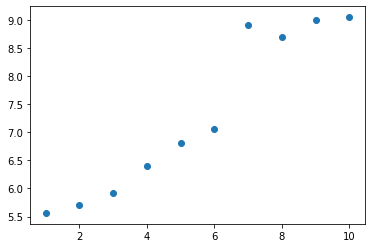

In [26]:
X,y = get_input_data_8_2()

plt.scatter(X,y)

# to be continued 


In [24]:
y

[5.56, 5.7, 5.91, 6.4, 6.8, 7.05, 8.9, 8.7, 9.0, 9.05]

***

### <font size=4 color = 'blue'><b>AdaBoost算法实现 - python </b></font>

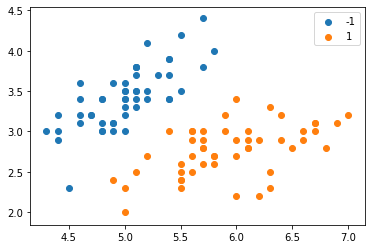

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from collections import Counter

def get_data():
    # 加载数据
    iris = load_iris()
    df = pd.DataFrame(iris.data,columns=iris.feature_names)
    df["label"] = iris.target

    # 重新定义列名
    df.columns = ["sepal length","sepal width","petal length","petal width","label"]

    # 定义输入数据集 取第0，1，及最后一列，前100条数据
    data = np.array(df.iloc[:100,[0,1,-1]])

    X=data[:,:-1]
    y=data[:,-1]

    return X,y


X,y = get_data()
y = np.array([1 if i==1 else -1 for i in y]) ##  y = {-1,+1}

# 划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# 画图
plt.scatter(X[:50,0],X[:50,1],label="-1")
plt.scatter(X[50:,0],X[50:,1],label="1")
plt.legend()


step1: 初始化训练数据的权值分布
#### $$D_1 = (w_{11},\cdots,w_{1i},\cdots,w_{1N}),\quad w_{1i} = \frac{1}{N}, \quad i=1,2,\cdots,N$$
<font><i><b>说明：假设训练数据集具有均匀的权值分布，即每个训练样本在基本分类器的学习中作用相同，这一假设保证第1步能够在原始数据上学习基本分类器$G_1(x)$</b></i></font>

In [11]:
_w = []                 # 存储每一轮学得中，学得到的弱分类器的权重
_M,_N = X_train.shape   # 训练数据集的形状 M行，N列

_iter_num = 50          # 定义迭代次数，即step2中学习的轮数
learning_rate =1.0      # 学习率
_alpha = []              # 弱分类器G(x)的系数

clf_sets = []             # 弱分类器集合

# 初始化训练数据集的权重
w0 = np.ones(_M)/_M
_w.append(w0)
_w

[array([0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125])]

step2 :对$m = 1,2,\cdots,M$ (m表示学习的轮数 )    
 
$\quad$ (a) 使用具有权值分布 $D_m$ 的训练数据集学习，得到基本分类器   <font size=3>$G_m(x) = \mathcal{X} \rightarrow \{-1,+1\}$</font>

$\quad$ (b) 计算 $G_m(x)$ 在训练数据集上的分类误差率  <font size=3> $e_m = \sum_{i=1}^N P(G_m(x_i)\neq y_i) = \sum_{i=1}^N w_{mi}I(G_m(x_i)\neq y_i)$ </font>

$\quad$ $\quad$ $w_{mi}$ 表示第$m$轮中第 $i$ 个实例的权值，$\sum_{i=1}^Nw_{mi} = 1$。 $G_m(x)$ 在加权的训练数据集上的分类误差率是被 $G_m(x)$ 误分类样本的权值之和。

$\quad$ (c) 计算 $G_m(x)$ 的系数    <font size=3> $\alpha_m = \frac{1}{2}log\frac{1-e_m}{e_m}$ </font>

$\quad$ $\quad$ 这里的对数是自然对数。 $\alpha_m$ 表示 $G_m(x)$ 在最终分类器中的重要性。 当 $e_m \leq \frac{1}{2}$ 时，$\alpha_m \geq 0$，并且$\alpha_m$ 随着 $e_m$的减少而增大，所以，分类误差率越小的基本分类器在最终分类器中的作用越大。

$\quad$ (d) 更新训练数据集的权值分布 <font size=3> $D_{m+1} = (w_{m+1,1},\cdots,w_{m+1,i},\cdots,w_{m+1,N})\\
w_{m+1,i} = \frac{w_{mi}}{Z_m}exp(-\alpha_my_iG_m(x_i)) =\left\{\begin{align} \frac{w_{mi}}{Z_m}exp(-\alpha_m) ,\quad & G_m(x_i) = y_i\\
                                                                              \frac{w_{mi}}{Z_m}exp(\alpha_m)  ,\quad & G_m(x_i) \neq y_i \end{align}\right. \quad i=1,2,\cdots,N$</font>

这里，$Z_m$是规范化因子.  <font size=3> $Z_m = \sum_{i=1}^N w_{mi}exp(-\alpha_my_iG_m(x_i))$ </font>
 
它使$D_{m+1}$ 成为一个概率分布

In [22]:
# features = X_train[:,0]
# labels = y_train

# 定义 基本分类器 并返回该分类器误差 step2-a,step2-b 
def _G(features,labels,weight):
    """对某特征进行分类
    输入：features 某一特征（某一列）; 
          labels:{-1,+1}, 即y
          weight: 该轮的权重
          
    输出：best_v 分类阈值 x<best_v -> -1 else 1
          error : 误差
          clf_result: 分类器结果
    """    
    min_error,best_v = 10000, 0.0 # 定义初始值
    feature_len = len(features)   # 训练特征数
    clf_result = None             # 分类结果

    # 单维feature 
    min_feature = min(features)
    max_feature = max(features)

    n_step = np.round((max_feature - min_feature + learning_rate)/learning_rate,0)
    # print(min_feature,max_feature,learning_rate,n_step)

    for i in range(np.int(n_step)):
        v = min_feature + i*learning_rate
        result = np.array([1 if i>v else -1 for i in features])  # 备注1

        err = np.sum(np.array([weight[i] if result[i]!=labels[i] else 0 for i in range(len(result))])) # 备注2

        if err < min_error:
            min_error = err 
            best_v = v
            clf_result = result

        # print("err:",err,"min_err",min_error,"v:",v, "best_v:",best_v)
        
    return min_error,best_v,clf_result

# min_error,best_v,clf_result = _G(features,labels,_w[0])      #########test

# 计算弱分类器的系数 见step2-c
def cal_alpha(error):
    return 0.5*np.log((1-error)/error)

# _alpha = cal_alpha(min_error)                            #########test

# 更新数据集的权重 1、规范化因子 Z_m
def _Z(clf_result,labels,alpha,weight):
    
    _z = np.sum(np.array([weight[i] * np.exp( - alpha * labels[i] * clf_result[i] ) for i in range(len(labels))]))
    
    return _z

# _z = _Z(clf_result,labels,_alpha,w0)                 #########test
        
    
# 更新数据集的权重
def update_w(weight,z,alpha,labels,clf_result):
    new_w = np.array([(weight[i] / z) * np.exp( - alpha * labels[i] * clf_result[i]) for i in range(len(labels))])
    print(new_w)
    return new_w

# update_w(w0,_z,_alpha,labels,clf_result)


In [27]:
# 组合
def fit(X,y):
    # 对每个特征进行基本分类器分器，获得误差最小的维度，以及基本分类器
    M,N = X.shape    
    print(M,N)
    
    for epoch in range(_iter_num): 
        min_err,best_v,clf_result = 100000,None,None
        print("epoch:",epoch)
        
        weight = _w[epoch]
        
        for i in range(N):            
            v,error,clf_result = _G(X[:,i],y,weight)
            
        if error < min_err:
            min_err = error 
            best_v = v 
            clf_result = clf_result
            
        if min_err == 0 :
            break
         
        print("min_err:",min_err,"best_v:",best_v,"clf_result:",clf_result)
        
        # 计算alpha 
        alpha = cal_alpha(min_err)
        _alpha.append(alpha)
        print("alpha:",alpha)
        
        # 更新分类器
        clf_sets.append(clf_result)
        
        # 计算Z 
        z = _Z(clf_result,y,alpha,weight)
        
        # 更新下一个权重
        next_w = update_w(weight, z, alpha, y, clf_result)
        _w.append(next_w)
        

fit(X_train,y_train)

80 2
epoch: 0
min_err: 4.0 best_v: 0.5249999999999999 clf_result: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1]
alpha: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
epoch: 1


c:\users\86150\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in log


In [148]:
# _w = []                 # 存储每一轮学得中，学得到的弱分类器的权重
# _alpha = []              # 弱分类器G(x)的系数
#clf_sets = []             # 弱分类器集合


0.7141428428542851

In [142]:
0.5*np.log((1-min_error)/min_error)

0.8673005276940532

**备注1：** 定义分类器 $\left\{\begin{align}x>v \Rightarrow +1 \\x\leq v \Rightarrow -1\end{align}\right.$ 

**备注2：** 弱分类器的误差  <font size=3> $e_m = \sum_{i=1}^N P(G_m(x_i)\neq y_i) = \sum_{i=1}^N w_{mi}I(G_m(x_i)\neq y_i)$ </font> ， 即被分错的样本的权重之和

In [111]:
features

array([4.3, 5.3, 5.4, 5.8, 5.2, 5.4, 5.7, 5.1, 5.9, 6.1, 5.7, 4.8, 4.8,
       4.5, 5.4, 4.4, 5.8, 6.8, 5.6, 4.8, 5.1, 5. , 5.5, 6. , 4.6, 5.6,
       6.1, 4.8, 6.9, 5. , 4.7, 6.5, 6.1, 5. , 5. , 5.1, 5.5, 6.1, 4.8,
       7. , 4.6, 6.3, 4.9, 5.7, 5.7, 6.2, 5.1, 4.7, 5.1, 5.7, 5.4, 4.4,
       4.9, 5.6, 5.8, 5.5, 6.7, 4.4, 5.5, 4.9, 4.6, 6. , 6. , 5.1, 5. ,
       5.1, 6.7, 5.6, 5. , 6.3, 5. , 5. , 5.4, 6.6, 5.2, 6.4, 5.5, 5.1,
       6.2, 4.9])

In [100]:
(max_feature - min_feature + learning_rate)/learning_rate

3.7

输入：训练数据集 $T = \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$ ，其中 $x_i \in \mathcal{X}\subseteq R^n, y_i\in\mathcal{Y} = \{-1,+1\}$ ; 弱学习算法。

输出：最终分类器 $G(x)$





 （3） 构建基本分类器的线性组合
#### $$f(x) = \sum_{m=1}^M\alpha_mG_m(x)$$
得到最终分类器
#### $$G(x) = sign(f(x)) = sign\Big(\sum_{m=1}^M\alpha_mG_m(x)\Big)$$
<font><i><b> 线性分组合$f(x)$ 实现$M$ 个基本分类器的加权表决。系数 $\alpha_m$ 表示了基本分类器 $g_m(x)$ 的重要性。这里，所有$\alpha_m$ 之后并不为1。利用基本分类器的线性组合构建最终分类器是AdaBoost的另一个特点。</b></i></font>